In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
sls = pd.read_csv("../data/sales.csv", parse_dates=["date"])

In [3]:
sls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             731 non-null    datetime64[ns]
 1   sales            731 non-null    int64         
 2   promo            731 non-null    int64         
 3   is_holiday       731 non-null    int64         
 4   price            731 non-null    float64       
 5   marketing_spend  731 non-null    float64       
 6   weekday          731 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 40.1 KB


In [4]:
sls.isna().sum()

date               0
sales              0
promo              0
is_holiday         0
price              0
marketing_spend    0
weekday            0
dtype: int64

In [5]:
sls['date'] = pd.to_datetime(sls['date'])
sls.set_index('date', inplace=True)

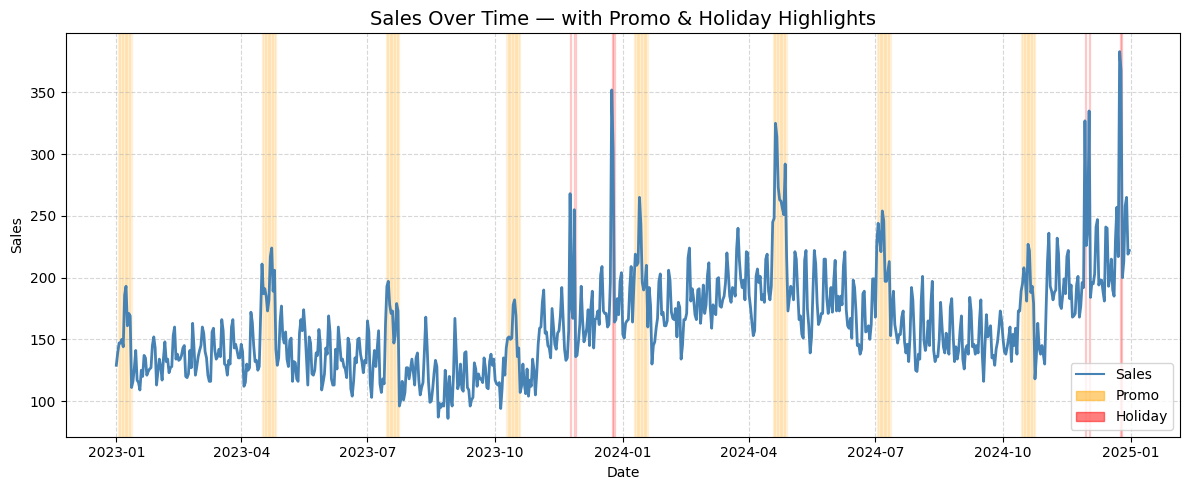

In [7]:
plt.figure(figsize=(12,5))
plt.plot(sls.index, sls['sales'], label='Sales', color='steelblue', linewidth=2)

for date in sls[sls['promo'] == 1].index:
    plt.axvspan(date, date + pd.Timedelta(days=1), color='orange', alpha=0.1)

for date in sls[sls['is_holiday'] == 1].index:
    plt.axvspan(date, date + pd.Timedelta(days=1), color='red', alpha=0.15)

promo_patch = mpatches.Patch(color='orange', alpha=0.5, label='Promo')
holiday_patch = mpatches.Patch(color='red', alpha=0.5, label='Holiday')

plt.legend(handles=[
    plt.Line2D([], [], color='steelblue', label='Sales'),
    promo_patch, 
    holiday_patch
])

plt.title("Sales Over Time — with Promo & Holiday Highlights", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


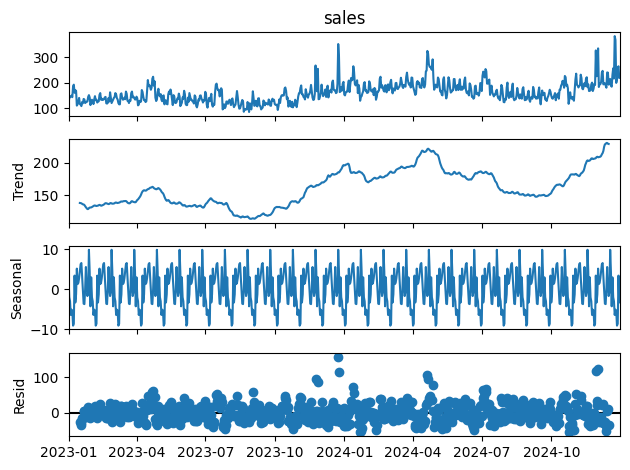

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(sls['sales'], model='additive', period=30)
result.plot()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(sls['sales'])


(np.float64(-1.3159039816683837),
 np.float64(0.6218651786309026),
 20,
 710,
 {'1%': np.float64(-3.439593802573824),
  '5%': np.float64(-2.865619356068967),
  '10%': np.float64(-2.568942332870462)},
 np.float64(6392.247807002228))

In [10]:
sls.head()

,sales,promo,is_holiday,price,marketing_spend,weekday,diff
date,,,,,,,
2023-01-01,129,0,0,20.31,674.90,6,NaN
2023-01-02,139,1,0,18.29,1076.54,0,10.0
2023-01-03,147,1,0,18.29,1078.13,1,8.0
2023-01-04,147,1,0,18.30,1079.67,2,0.0
2023-01-05,150,1,0,18.31,1081.16,3,3.0


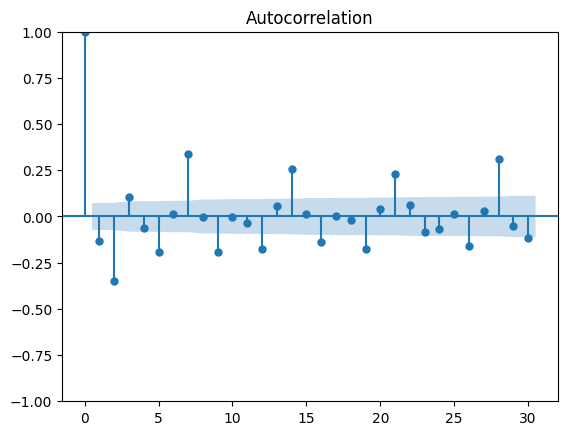

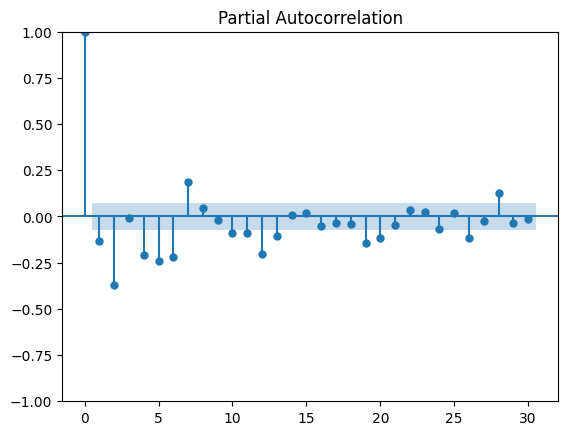

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sls['sales'])
plot_pacf(sls['sales'])
plt.show()

In [ ]:
sls['sales_diff'] = sls['sales'].diff()

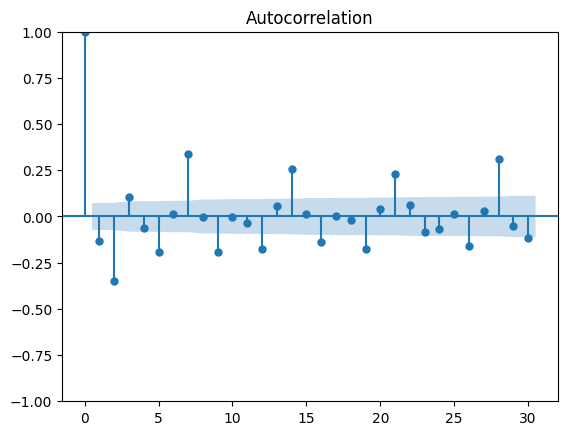

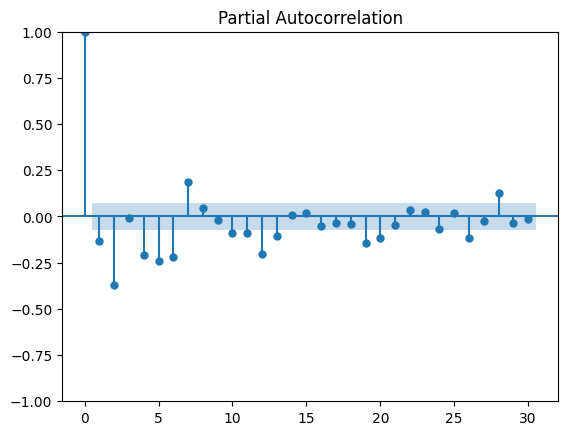

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sls['sales_diff'].dropna(), lags=30)
plot_pacf(sls['sales_diff'].dropna(), lags=30)
plt.show()